## 1 Импорт библиотек и модулей

In [1]:
!pip install -q ydata_profiling

In [2]:
%matplotlib inline

In [3]:
# для работы с данными
import pandas as pd

# для EDA анализа
import ydata_profiling

# для математических вычислений
import numpy as np

# для разделения данных на выборки
from sklearn.model_selection import train_test_split

# для визуализации
import seaborn as sns
import matplotlib.pyplot as plt

# для масштабирования признаков
from sklearn.preprocessing import RobustScaler

# модель машинного обучения
from sklearn.linear_model import LinearRegression

# для расчёта качества моделей
from sklearn.metrics import mean_squared_error

## 2 Открытие файлов с данными и изучение общей информации
### 2.1 Первый регион
Считаем данные из csv-файла в датафрейм, сохраним в переменную `df_0` и проведём EDA анализ.

In [6]:
def read_eda(name):
    try:
        df = pd.read_csv('/datasets/' + name + '.csv')
    except:
        df = pd.read_csv('https://code.s3.yandex.net/datasets/' + name + '.csv')
    ydata_profiling.ProfileReport(df, progress_bar=False).to_file(name + '.html')
    return df

In [7]:
df_0 = read_eda('geo_data_0')

[Посмотреть анализ.](https://www.dropbox.com/s/4hwqj11wxtd19qe/geo_data_0.html?dl=0)

- **В данных 100000 строк, 5 столбцов, 2 типа данных: float64, object.**
- **Проблемы отсутствуют.**

### 2.2 Второй регион
Считаем данные из csv-файла в датафрейм, сохраним в переменную `df_1` и проведём EDA анализ.

In [10]:
df_1 = read_eda('geo_data_1')

[Посмотреть анализ.](https://www.dropbox.com/s/tezguk46aolnlae/geo_data_1.html?dl=0)

- **В данных 100000 строк, 5 столбцов, 2 типа данных: float64, object.**
- **Проблемы отсутствуют.**

### 2.3 Третий регион
Считаем данные из csv-файла в датафрейм, сохраним в переменную `df_2` и проведём EDA анализ.

In [11]:
df_2 = read_eda('geo_data_2')

[Посмотреть анализ.](https://www.dropbox.com/s/4a91jawtttztvys/geo_data_2.html?dl=0)

- **В данных 100000 строк, 5 столбцов, 2 типа данных: float64, object.**
- **Проблемы отсутствуют.**

<div style="border:solid steelblue 5px; padding: 30px">
<p>
        <b>После изучения данных, стала ясна их общая структура:</b> 100000 строк, 5 столбцов, 2 типа данных: float64, object.<br> <b>Также выяснилось, что данные не нуждаются в обработке.</b>
    </p>  
</div>

## 3 Подготовка данных
### 3.1 Удаление столбцов
Столбцы `id` содержат идентификационные переменные, которые не помогут модели в нахождении общих закономерностей, поэтому удалим их.

In [17]:
df_0 = df_0.drop('id', axis=1)
df_1 = df_1.drop('id', axis=1)
df_2 = df_2.drop('id', axis=1)

### 3.2 Разбивка
Разобьём данные на обучающую и валидационную выборки.

In [18]:
RANDOM_STATE = 0

def split(df):
    x = df.drop('product', axis=1)
    y = df['product']
    
    x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25, random_state=RANDOM_STATE)
    return x_train, x_valid, y_train, y_valid

In [19]:
df_0_x_train, df_0_x_valid, df_0_y_train, df_0_y_valid = split(df_0)
df_1_x_train, df_1_x_valid, df_1_y_train, df_1_y_valid = split(df_1)
df_2_x_train, df_2_x_valid, df_2_y_train, df_2_y_valid = split(df_2)

Проверим размеры выборок.

In [20]:
print('Размер обучающей выборки:', df_0_x_train.shape)
print('Размер валидационной выборки:', df_0_x_valid.shape)

Размер обучающей выборки: (75000, 3)
Размер валидационной выборки: (25000, 3)


### 3.3 Масштабирование признаков
Проверим наличие выбросов в датафрейме `df_0` на диаграммах размаха.

In [21]:
def boxplots(df):
    for column in df.columns:
        (
            df
            .boxplot(column=column, figsize=(15, 3), vert=False)
            .set_title('Диаграмма размаха по столбцу ' + column + "\n", size=20)
        )
        plt.show()

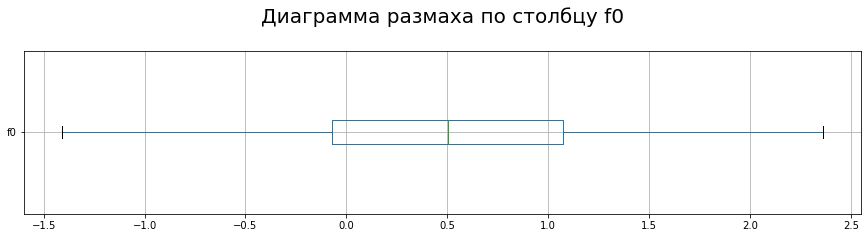

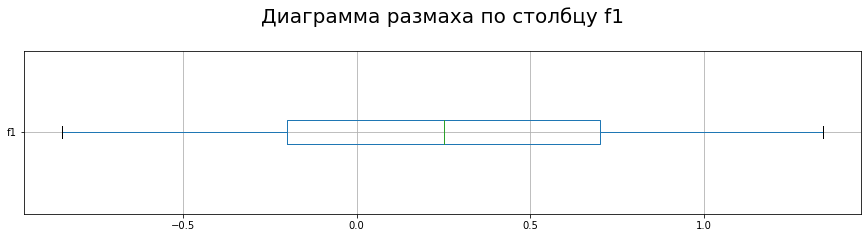

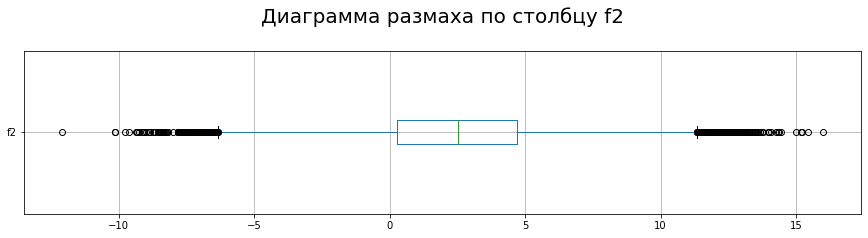

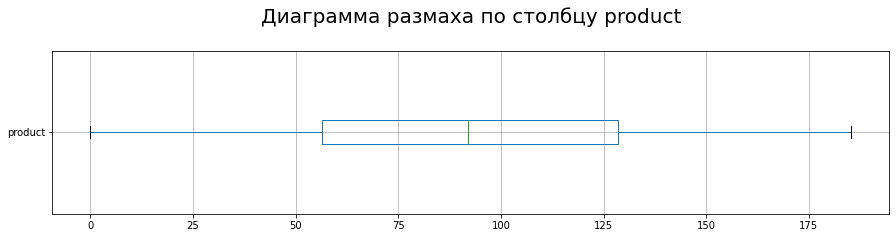

In [22]:
boxplots(df_0)

В столбце `f2` присутствуют выбросы, поэтому используем устойчивый к выбросам `RobustScaler` ([сравнение масштабаторов на данных с выбросами](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html)), чтобы признаки стали равными по значимости.

In [23]:
pd.options.mode.chained_assignment = None

scaler = RobustScaler()

def scaling(x_train, x_valid):
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_valid = scaler.transform(x_valid)
    return x_train, x_valid

In [24]:
df_0_x_train, df_0_x_valid = scaling(df_0_x_train, df_0_x_valid)
df_1_x_train, df_1_x_valid = scaling(df_1_x_train, df_1_x_valid)
df_2_x_train, df_2_x_valid = scaling(df_2_x_train, df_2_x_valid)

<div style="border:solid steelblue 5px; padding: 30px">
   <p>
        <b>Результаты подготовки данных:</b>
        <ol>
        <li>Удалены ненужные столбцы.</li>
        <li>Данные разбиты на выборки.</li>
        <li>Численные признаки масштабированы.</li>
        </ol>
   </p>  
</div>

## 4 Обучение и проверка модели

Обучим модели, сделаем предсказания на валидационной выборке, а также выведем средний запас предсказанного сырья и RMSE моделей.

In [25]:
models_results = pd.DataFrame()

In [26]:
def train_predict(x_train, y_train, x_valid, y_valid, region):
    model = LinearRegression()
    
    model.fit(x_train, y_train)
    prediction = model.predict(x_valid)
    prediction = pd.Series(prediction)
    
    mean_prediction = prediction.mean()
    rmse = mean_squared_error(y_valid, prediction) ** 0.5
    
    region = region + ' регион'
    models_results.loc['Средний запас предсказанного сырья', region] = mean_prediction
    models_results.loc['RMSE модели', region] = rmse
    return prediction

In [27]:
prediction_0 = train_predict(df_0_x_train, df_0_y_train, df_0_x_valid, df_0_y_valid, 'Первый')
prediction_1 = train_predict(df_1_x_train, df_1_y_train, df_1_x_valid, df_1_y_valid, 'Второй')
prediction_2 = train_predict(df_2_x_train, df_2_y_train, df_2_x_valid, df_2_y_valid, 'Третий')

models_results

,Первый регион,Второй регион,Третий регион
Средний запас предсказанного сырья,92.271449,69.151624,94.707531
RMSE модели,37.481009,0.887257,40.312907


<div style="border:solid steelblue 5px; padding: 30px">
   <p>
        <b>Результаты работы с моделью:</b>
        <li>В третьем регионе самый лучший запас сырья, при этом худшая ошибка.</li>
        <li>Показатели первого региона чуть меньше показателей третьего.</li>
        <li>Во втором регионе лучшая ошибка, при этом худший запас сырья.</li>
   </p>  
</div>

## 5 Подготовка к расчёту прибыли
Сохраним все ключевые значения для расчётов в отдельных переменных.

In [28]:
BUDGET = 10**10
PRICE = 450 * 1000
NUMBER_OF_WELLS = 200

Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины.

In [29]:
print('Достаточный объём сырья для безубыточной разработки:', (BUDGET / PRICE / NUMBER_OF_WELLS))

Достаточный объём сырья для безубыточной разработки: 111.11111111111111


Сравним полученный объём сырья со средним запасом в каждом регионе. 

In [30]:
models_results.iloc[0].to_frame()

,Средний запас предсказанного сырья
Первый регион,92.271449
Второй регион,69.151624
Третий регион,94.707531


<div style="border:solid steelblue 5px; padding: 30px">
   <p>
        <b>По среднему запасу предсказанного сырья не подходит ни один регион.</b>
   </p>  
</div>

## 6 Расчёт прибыли и рисков 
Рассчитаем прибыль по 200 лучшим скважинам и предсказаниям моделей.

In [31]:
def profit(y_valid, prediction, region='', message=True):
    prediction_sorted = prediction.reset_index(drop=True).sort_values(ascending=False)
    y_valid_sorted = y_valid.reset_index(drop=True)[prediction_sorted.index][:200]

    profit = sum(y_valid_sorted) * PRICE - BUDGET
    
    if message == True:
        print('Прибыль в ' + region + ' регионе: ', profit)
    else:
        return profit

In [32]:
profit(df_0_y_valid, prediction_0, '1')
profit(df_1_y_valid, prediction_1, '2')
profit(df_2_y_valid, prediction_2, '3')

Прибыль в 1 регионе:  3363408079.60795
Прибыль в 2 регионе:  2415086696.681551
Прибыль в 3 регионе:  2623878683.516424


Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.

In [33]:
results = pd.DataFrame()

state = np.random.RandomState(RANDOM_STATE)

def bootstrap(y_valid, prediction, region):
    profits = []
    riscs = []
    for i in range(1000):
        y_valid_subsample = y_valid.reset_index(drop=True).sample(n=500, replace=True, random_state=state)
        prediction_subsample = prediction[y_valid_subsample.index]
        
        temporary_profit = profit(y_valid_subsample, prediction_subsample, message=False)
        profits.append(temporary_profit)
        riscs.append(temporary_profit < 0)

    profits = pd.Series(profits)

    lower = profits.quantile(0.025)
    upper = profits.quantile(0.975)
    
    mean_profit = profits.mean()
    
    riscs = pd.Series(riscs)
    risc_percent = riscs.mean() * 100
    
    region = region + ' регион'
    results.loc[region, 'Средняя прибыль'] = mean_profit
    results.loc[region, '95% доверительный интервал'] = ('(' + str(lower) + ', ' + str(upper) + ')')
    results.loc[region, 'Риск убытков'] = risc_percent

In [34]:
bootstrap(df_0_y_valid, prediction_0, 'Первый')
bootstrap(df_1_y_valid, prediction_1, 'Второй')
bootstrap(df_2_y_valid, prediction_2, 'Третий')

In [35]:
results

,Средняя прибыль,95% доверительный интервал,Риск убытков
Первый регион,4.428718e+08,"(-49234991.8510545, 921134683.9825737)",3.9
Второй регион,4.695379e+08,"(85178911.6307098, 850894622.6076844)",0.8
Третий регион,3.844244e+08,"(-151024558.44024011, 916797872.0545604)",6.9


<div style="border:solid steelblue 5px; padding: 30px">
   <p>
        <b>Результаты расчётов:</b>
        <li>В третьем регионе худшие показатели.</li>
        <li>Первый регион лучше третьего, но риск убытков превышает 2.5%.</li>
        <li>Во втором регионе лучшие показатели.</li>
   </p>  
</div>

## 7 Общий вывод

<div style="border:solid steelblue 5px; padding: 30px">
   <p>
        <b>Проделано:</b>
        <ol><li>Изучена общая информацию о данных.</li>
        <li>Проведена подготовка данных: удалены ненужные столбцы, данные разбиты на выборки, численные признаки масштабированы.</li>
        <li>Модель обучена и проверена.</li>
        <li>Проведна подготовка к расчёту прибыли.</li>
        <li>Прибыль и риски рассчитаны.</li>
        </ol>
        <b>Выявлено:</b>
        <li>В третьем регионе самый лучший запас сырья, при этом худшая ошибка.</li>
        <li>Показатели первого региона чуть меньше показателей третьего.</li>
        <li>Во втором регионе лучшая ошибка, при этом худший запас сырья.</li>
        <li>По среднему запасу предсказанного сырья не подходит ни один регион.</li>
        <li>В третьем регионе худшие показатели.</li>
        <li>Первый регион лучше третьего, но риск убытков превышает 2.5%.</li>
        <li>Во втором регионе лучшие показатели.</li><br>
        <b>Рекомендация: второй регион — лучший.</b>
   </p>  
</div>